# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Libraries

In [566]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy as sc

***
# Import and View Data

In [567]:
# read in readmissions data provided
hosp_data_orig = pd.read_csv('data/cms_hospital_readmissions.csv')

In [568]:
# number of rows and columns in df
hosp_data_orig.shape

(16860, 12)

In [569]:
hosp_data_orig.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [570]:
# setup abreviation variables for each column header

keys = ['HN', 'PN', 'S', 'MN', 'NoD', 'Fn', 'ExcRR', 'PreRR', 'ExpRR', 'NoR', 'SD', 'ED']
values = list(hosp_data_orig.columns)

# print(keys)
# print(len(keys))
# print(values)
# print(len(values))

for i, v in enumerate(keys):
    abv = keys[i]
    header = values[i]
    print(abv, '=', header)
    exec('%s = %s' % (abv,'header'))

print()
print('Example: NoD =', NoD)

HN = Hospital Name
PN = Provider Number
S = State
MN = Measure Name
NoD = Number of Discharges
Fn = Footnote
ExcRR = Excess Readmission Ratio
PreRR = Predicted Readmission Rate
ExpRR = Expected Readmission Rate
NoR = Number of Readmissions
SD = Start Date
ED = End Date

Example: NoD = Number of Discharges


## Data Information
Center for Medicare Services (CMS) began reducing Medicare payments to Inpatient Prospective Payment System hospitals with excess readmissions

\begin{equation*}
Excess Readmissions Ratio = \frac{Predicted Readmission Rate}{Expected Readmission Rate}
\end{equation*}

* 30 day window
* Measure Name
    * Heart Attack
    * Heart Failure
    * Pneumonia
    * Chronic Obstructive Pulmonary Disease
    * Hip/knee replacement
    * Coronary Artery Bypass Graft Surgery
* Based on an average hospital with similar patients
* A ratio greater than 1 indicates excess readmissions

***
# Clean Data

In [571]:
# work on separate df to keep original df the same

hosp_data = hosp_data_orig.copy()

## State Column

In [572]:
# set the state column to a categorical data type

hosp_data[S] = hosp_data[S].astype('category')
hosp_data.State.dtypes

CategoricalDtype(categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
                  'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
                  'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
                  'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
                  'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
                  'WY'],
                 ordered=False)

## Measure Name Column

In [573]:
# set the measure name column to a categorical data type

hosp_data[MN] = hosp_data[MN].astype('category')
hosp_data[MN].dtypes

CategoricalDtype(categories=['READM-30-AMI-HRRP', 'READM-30-COPD-HRRP',
                  'READM-30-HF-HRRP', 'READM-30-HIP-KNEE-HRRP',
                  'READM-30-PN-HRRP'],
                 ordered=False)

## Footnote Column

In [574]:
# set the column data type to categorical

hosp_data[Fn] = hosp_data[Fn].fillna('')
hosp_data[Fn] = hosp_data[Fn].astype('category')
hosp_data[Fn].dtypes

CategoricalDtype(categories=[1.0, 5.0, 7.0, ''], ordered=False)

## Number of Discharges Column

In [575]:
# deal with missing and inconvenient portions of data 

# remove rows of data where the number of discharges are not available
hosp_data = hosp_data[hosp_data[NoD] != 'Not Available']

# convert the number of discharges column into an integer data type
hosp_data[NoD] = hosp_data[NoD].astype('int')

# sort df by number of discharges
hosp_data = hosp_data.sort_values(NoD)

hosp_data[NoD].dtypes

dtype('int32')

## Start & End Date Columns

In [576]:
# analyze start and end date columns
# if the data is a constant, store it in a variable, and delete the colum

start_dates = hosp_data[SD].unique()
end_dates = hosp_data[ED].unique()

if(len(start_dates)==1):
    start_date = start_dates[0]
    print('All data STARTS on the same date:', start_date)
    hosp_data = hosp_data.drop(['Start Date'], axis=1)
    
if(len(end_dates)==1):
    end_date = end_dates[0]
    print('All data ENDS on the same date:', end_date)
    hosp_data = hosp_data.drop(['End Date'], axis=1)  

All data STARTS on the same date: 07/01/2010
All data ENDS on the same date: 06/30/2013


***
# Preliminary Look

## Cleaned Data

In [577]:
hosp_data.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7,NaN,NaN,NaN,NaN
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7,NaN,NaN,NaN,NaN
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7,NaN,NaN,NaN,NaN
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7,NaN,NaN,NaN,NaN


## Preliminary Analysis

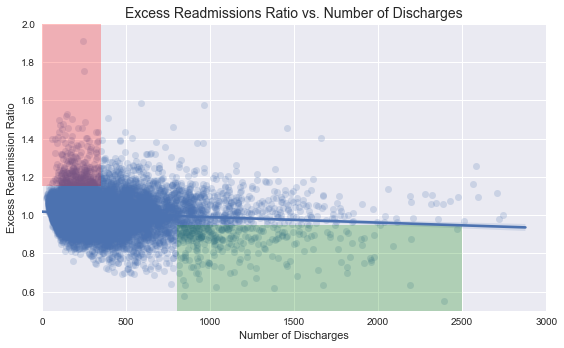

In [578]:
# scatterplot for number of discharges vs. excess rate of readmissions

# for number of discharges between (0 and 3000)
hosp_data_plot = hosp_data.loc[(hosp_data[NoD] > 0) & (hosp_data[NoD] < 3000)]

x = hosp_data_plot[NoD]
y = hosp_data_plot[ExcRR]

sns.set(rc={'figure.figsize':(8,5)})
fig, ax = plt.subplots()

sns.regplot(x, y, fit_reg=True, scatter_kws={'alpha':0.2})

_ = ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .25, interpolate=True)
_ = ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .25, interpolate=True)

_ = plt.xlim(0, 3000)
_ = plt.ylim(0.5, 2.0)
_ = plt.title('Excess Readmissions Ratio vs. Number of Discharges', fontsize=14)
_ = fig.tight_layout()

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
# Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A) Initial Plot Observations

## Overall, rate of readmissions is trending down with increasing number of discharges?

In [579]:
# linear regression

slope, intercept, r_value, p_value, std_err = sc.stats.linregress(x, y)

print('y = %.2ex + %0.2f' % (slope, intercept))
print('Slope: %.2e' % slope)
print('Y-Intercept: %0.2f' % intercept)
print('r_sqaured: %.4f' % r_value)
print('p_value: %.10f' % p_value)
print('Standard Error: %.10f' % std_err)

y = -2.86e-05x + 1.02
Slope: -2.86e-05
Y-Intercept: 1.02
r_sqaured: -0.0931
p_value: 0.0000000000
Standard Error: 0.0000028498


The slope technically negative, which means that the rate of readmissions is trending down with increasing number of discharges. But the slope is extremely small (close to zero) with an e-05. With a slope this close to zero, it could be estimated to be 0. Therefore there is no correlation between "Excess Readmission Ratio" and "Number of Discharges".

## With lower number of discharges, there is a greater incidence of excess rate of readmissions? (Red Zone)

In [580]:
# shaded red area is from x(0,350)

red = hosp_data_plot[hosp_data_plot[NoD] <= 350]
red_not = hosp_data_plot[hosp_data_plot[NoD] > 350]

red_l = red[red[ExcRR] <  1].count()[ExcRR]
red_e = red[red[ExcRR] == 1].count()[ExcRR]
red_g = red[red[ExcRR] >  1].count()[ExcRR]
red_t = len(red.index)
red_a = red_g / red_t
print('RED ZONE - When Number of Discharges is <= 350,\
 the percent of hospitals with an Excess Readmission Rate > 1, is %.1f%%' % (red_a*100))

red_not_l = red_not[red_not[ExcRR] <  1].count()[ExcRR]
red_not_e = red_not[red_not[ExcRR] == 1].count()[ExcRR]
red_not_g = red_not[red_not[ExcRR] >  1].count()[ExcRR]
red_not_t = len(red_not.index)
red_not_a = red_not_g / red_not_t
print('NOT RED ZONE - When Number of Discharges is > 350,\
 the percent of hospitals with an Excess Readmission Rate > 1, is %.1f%%' % (red_not_a*100))

RED ZONE - When Number of Discharges is <= 350, the percent of hospitals with an Excess Readmission Rate > 1, is 53.3%
NOT RED ZONE - When Number of Discharges is > 350, the percent of hospitals with an Excess Readmission Rate > 1, is 49.1%


With lower number of discharges, there is a greater incidence of excess rate of readmissions.
In the red zone, roughly 53% of the time, the Excess Readmission Rate is greater than 1.
In the not red zone, roughly 49% of the time, the Excess Readmission Rate is greater than 1.

## With higher number of discharges, there is a greater incidence of lower rates of readmissions (Green Zone)

In [581]:
green = hosp_data_plot[hosp_data_plot['Number of Discharges'] >= 800]
green_not = hosp_data_plot[hosp_data_plot['Number of Discharges'] < 800]

green_l = green[green[ExcRR] <  1].count()[ExcRR]
green_e = green[green[ExcRR] == 1].count()[ExcRR]
green_g = green[green[ExcRR] >  1].count()[ExcRR]
green_t = len(green.index)
green_b = green_l / green_t
print('GREEN ZONE - When Number of Discharges is >= 800,\
 the percent of hospitals with an Excess Readmission Rate > 1, is %.1f%%' % (green_b*100))

green_not_l = green_not[green_not[ExcRR] <  1].count()[ExcRR]
green_not_e = green_not[green_not[ExcRR] == 1].count()[ExcRR]
green_not_g = green_not[green_not[ExcRR] >  1].count()[ExcRR]
green_not_t = len(green_not.index)
green_not_b = green_not_l / green_not_t
print('NOT GREEN ZONE - When Number of Discharges is < 800,\
 the percent of hospitals with an Excess Readmission Rate > 1, is %.1f%%' % (green_not_b*100))

GREEN ZONE - When Number of Discharges is >= 800, the percent of hospitals with an Excess Readmission Rate > 1, is 52.6%
NOT GREEN ZONE - When Number of Discharges is < 800, the percent of hospitals with an Excess Readmission Rate > 1, is 47.9%


With higher number of discharges, there is a greater incidence of lower rates of readmissions.
In the green zone, roughly 53% of the time, the Excess Readmission Rate is less than 1.
In the not green zone, roughly 48% of the time, the Excess Readmission Rate is less than 1.

# B) Statistics

* In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
* In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [582]:
small = hosp_data_plot[hosp_data_plot[NoD] < 100].shape[0]
medium = hosp_data_plot[(hosp_data_plot[NoD] >= 100) & (hosp_data_plot[NoD] <= 1000)].shape[0]
large = hosp_data_plot[hosp_data_plot[NoD] > 1000].shape[0]
total = len(hosp_data_plot)

print('Small: %d (%.1f%%)' % (small, 100*small/total))
print('Medium: %d (%.1f%%)' % (medium, 100*medium/total))
print('Large: %d (%.1f%%)' % (large, 100*large/total))
print('Total: %d' % total)

Small: 1188 (10.3%)
Medium: 9846 (85.7%)
Large: 460 (4.0%)
Total: 11494


Dividing the data into categories of small, medium and large seems quite arbitrary. Are there already proven ways of making this distinction? And really, the report only reviews the Small and Large hospitals, so it leaves out quite a bit of the data (~85%)
* Small < 100
* Medium > 100 and < 1000
* Large > 1000

# C) Conclusions

These are the conclusions that were reported. This section will try to affirm or deny these claims.
* There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
* Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

## Significant Correlation between Number of Discharges and Excess Readmission Rates

### 1) Hypothesis Test

* Null Hypothesis (H0) = There is NOT a significant correlation between the Number of Discharges and Excess Readmission Rates
* Alternative Hypothesis (Ha) = There is a significant correlation between the Number of Discharges and Excess Readmission Rates

In [583]:
# The Statistical Significance/Level, alpha (α)
alpha = 0.01

There are three conditions in which the Central Limit Theorem can be applied.
* Random - Random sample or randomized experiment
* Normal - The sampling distribution needs to be approximately normal
* Independent - Individual Observations need to be Independent

#### Random
All of the data is from Inpatient Prospective Payment System hospitals, but within that category seem to be random.

#### Normal
* expected successes: np >= 10
* AND
* expected failures: n(1−p) >= 10

In [584]:
# expected successes and failures

exp_succ = len(hosp_data_plot[hosp_data_plot[ExcRR] > 1].index)
exp_fail = len(hosp_data_plot[hosp_data_plot[ExcRR] < 1].index)

print('Expected Successes:', exp_succ)
print('Expected Failures', exp_fail)

if (exp_succ > 10 and exp_fail > 10):
    print('Distribution is Normal')
else:
    print('Distribution is NOT Normal')

Expected Successes: 5938
Expected Failures 5545
Distribution is Normal


#### Independent
There may be some dependency depending upon if patients switch hospitals, but without knowing that information for certain, it will be assumed each hospital's data is independent of each other.

### 2) Pearson Correlation Coefficient and p-value

Pearson Correlation Coefficient
* It measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

p-value
* It roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. It is a 2-tailed p-value.

In [585]:
# generate the Pearson value and the p-value

pearson_value, p_value = sc.stats.pearsonr(x, y)

print('Pearson Correlation Coefficient:', pearson_value)
print('p-value:', p_value)

Pearson Correlation Coefficient: -0.09309554287590441
p-value: 1.5022756426464526e-23


### 3) Statistical Significance

In [586]:
# check for statistical significance

if p_value > alpha:
    print('The p-value (%.2e) is greater than alpha (%0.2f)' % (p_value, alpha))
    print('Failed to Reject the Null Hypothesis (H0).')
    print('There is NOT a significant correlation between the Number of Discharges and Excess Readmission Rates')
else:
    print('The p-value (%.2e) is less than alpha (%0.2f)' % (p_value, alpha))
    print('Reject the Null Hypothesis (H0).')
    print('There is a significant correlation between the Number of Discharges and Excess Readmission Rates')

The p-value (1.50e-23) is less than alpha (0.01)
Reject the Null Hypothesis (H0).
There is a significant correlation between the Number of Discharges and Excess Readmission Rates


# D) Review the Regulatory Policy Recommendations

* Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
* Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges

### 4) Statistical Significance vs. Practical Significance

Pearson Correlation Coefficient
* The value (-0.093) is fairly close to zero indicating that there is some, but very little correlation.

p-value
* The value (e-23) is extremely close to zero indicating a very low likelyhood that the dataset could produce a correlation at least as extreme as (-0.09).

So statistically speaking, there is significant correlation between the Excess Readmission Ratio (ExcRR) and the Number of Discharges (NoD). But practically speeaking, the correlation is extremely weak to actually base new regulations on this dataset and conclusions.

Also, the statistics calculated by the report divided the hospitals into 3 groups separated by NoD = 100 and NoD = 1,000. But the Regulatory Policy Recommendation divides the hospitals into 2 groups separated by NoD = 300. So without dividing the hospitals by NoD = 300, I can't recommend to impletement that policy.

Directives and incentives should NOT be provided. The free market can AND should handle these forces, not the government. The free market is the best way to respond to correlations like Number of Discharges and Excess Readmission Ratio. Competition will increase value and decrease costs to the consumers/patients.

### 5) Review the Scatter Plot


#### Advantages
Simplicity - This is the simplist type of plot to display the data and see if there is a correlation between 2 columns of data

#### Disadvantages
Cluttered - With many data points so close to each other, the data points turn into a blob that is hard to read and understand the density in that area, and therefore the corrleation.

In [587]:
hosp_data_plot.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,,1.0914,26.8,24.6,12.0
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,,1.0961,24.8,22.6,12.0
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,,1.0934,24.4,22.3,12.0
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,,1.0908,21.0,19.3,11.0
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,,1.1123,23.2,20.9,13.0


#### Construct Another Plot
Construct another plot that conveys the same information in a more direct manner

C:\Users\Miles\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Miles\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


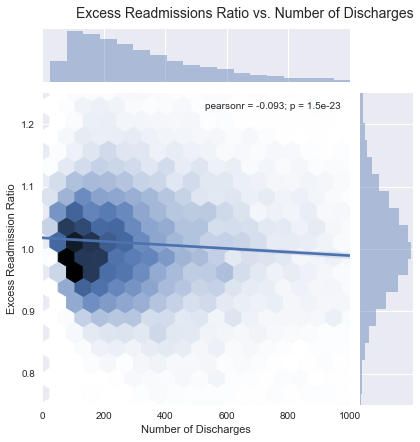

In [588]:
sns.set()

plot = sns.jointplot(x, y, 
                     kind='hex',
                     xlim=(0,1000),
                     ylim=(0.75,1.25))

sns.regplot(x, y, ax=plot.ax_joint, scatter=False)

_ = plt.title('Excess Readmissions Ratio vs. Number of Discharges', 
              fontsize=14,
              loc='right',
              pad=75)